In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from tqdm import tqdm

/home/h2amer/AhmedH.Salamah/virtual_env/torch_KD_small_dataset/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from scipy.stats import bootstrap

In [3]:
Y_sen_list = np.load("./grad_10k/Y_sen_listAlexnet.npy")
# Y_sen_list = np.load("./grad/Cb_sen_listVGG11.npy")
# Y_sen_list = np.load("./grad/Y_sen_listSqueezenet.npy")
# Y_sen_list = np.load("./grad_10k/Y_sen_listResnet18.npy")

# Cb_sen_listAlexnet = np.load("Cb_sen_listAlexnet.npy")
# Cr_sen_listAlexnet = np.load("Cr_sen_listAlexnet.npy")

old_alex_y = [2.192572922287323e-06,2.8957862234570873e-06,2.75778590693854e-06,2.9725103721692557e-06,2.8534488469181643e-06,3.0908977245532583e-06,3.207812308315508e-06,2.8426566628323204e-06,2.7970716047146864e-06,2.944457101053659e-06,3.038358721962964e-06,3.1379195792397027e-06,3.154141797938897e-06,3.1571008738822898e-06,3.1432954028519924e-06,3.6999862986539113e-06,2.9389391531425853e-06,3.322521499363234e-06,3.120407102664824e-06,2.534633453778156e-06,3.3207297504854083e-06,3.1064304936836377e-06,2.49776631033421e-06,3.1669813279666565e-06,3.36599375184188e-06,3.266091061776866e-06,2.4746742854127854e-06,2.9180658737669268e-06,1.844672177964554e-06,1.9752484111095566e-06,2.465149667195831e-06,2.2771814390793586e-06,2.457908795048938e-06,2.250308012075813e-06,2.322233482901433e-06,1.965390148314197e-06,1.2331376031984196e-06,1.8058779319199113e-06,1.9505908093991376e-06,1.4770087828978751e-06,1.4876052926385024e-06,1.544473903842897e-06,1.064513470243516e-06,9.990942676588832e-07,1.136483198599196e-06,1.064354549026309e-06,1.2580812194564794e-06,1.6912881987085841e-06,8.704508086859228e-07,7.143005952406999e-07,9.843716230622196e-07,8.742981920373661e-07,8.873545921836365e-07,6.515947443485799e-07,4.840645815845785e-07,7.279272798139565e-07,7.252614146570334e-07,4.805375855694032e-07,3.696343102019752e-07,5.081007976736865e-07,4.011885480592318e-07,3.065362075271715e-07,2.843500649544724e-07,2.1941756806311863e-07,]
old_vgg11_y = [4.9470473900620625e-06,6.009000244384072e-06,5.871160995145207e-06,6.541607177261708e-06,6.1991776177410694e-06,6.439682659335675e-06,6.637700123003293e-06,6.580618134258707e-06,6.622826016848551e-06,6.696180948003729e-06,6.503289335819831e-06,6.670867254137413e-06,6.593362278399917e-06,6.670080540558057e-06,6.66286348845774e-06,6.134006051601341e-06,6.486941918052662e-06,6.545979383861749e-06,6.553931898673578e-06,6.351020234537369e-06,5.900445241163584e-06,5.523382875424891e-06,5.675403363492322e-06,6.040521184475229e-06,6.211149075615031e-06,6.1162714095867255e-06,5.851053405426185e-06,5.845200006884583e-06,5.6247698075332125e-06,5.43789973705857e-06,5.545880530336504e-06,5.595642635685219e-06,5.544432340641909e-06,5.4258510604432895e-06,5.172877872738326e-06,5.243340782380078e-06,4.84688081029315e-06,4.791233375149256e-06,5.0074597786022535e-06,5.066646661143606e-06,5.108617029109888e-06,5.056675894350926e-06,5.181621848443907e-06,4.757700723332456e-06,4.5945828020959105e-06,4.57553425286667e-06,4.474250899263784e-06,4.374661160393306e-06,4.407132408882739e-06,3.888494988103886e-06,3.897300266564654e-06,3.862775115960092e-06,4.114873482063059e-06,4.216637027309502e-06,3.7247114893038885e-06,3.273211760591731e-06,3.1790589281457996e-06,3.382996977412966e-06,2.604888180266881e-06,2.566240553875573e-06,2.7842917763993375e-06,2.0549097526006296e-06,1.972020857453768e-06,1.462939555720438e-06]
old_squeezenet_y = [6.0272587508639545e-06,6.93686045866589e-06,6.597992794377651e-06,6.6186688857873226e-06,6.872387236404688e-06,6.799431327475553e-06,6.866436964785031e-06,6.923153230373027e-06,6.8911458525875375e-06,6.778787089124037e-06,6.684400484599903e-06,6.938394966319769e-06,7.02474389557319e-06,6.893257488269788e-06,6.690214691873739e-06,6.2049575581188805e-06,6.6930776109828515e-06,6.869959366268111e-06,7.063200859299469e-06,6.646085990980081e-06,6.369026060580371e-06,4.979360018152804e-06,6.241189640413665e-06,6.811519614555904e-06,6.582280552014419e-06,6.626303534532384e-06,6.111534273333254e-06,4.985384079246062e-06,2.9008757908350306e-06,4.927679436638706e-06,5.985529272447911e-06,6.1581768851864545e-06,6.152975009690263e-06,6.439571083523265e-06,4.92299433706492e-06,2.7788332936809573e-06,2.9547199730544212e-06,5.216723211623476e-06,5.490126252694185e-06,5.60914132162052e-06,5.4418562319686725e-06,4.871555775161291e-06,3.1291846219821093e-06,3.1534388314051842e-06,4.2681886266342186e-06,4.475816388640333e-06,4.552513386642485e-06,4.202594656422416e-06,3.4255957628877434e-06,2.5504638782537067e-06,3.3494642478267942e-06,3.422097535028617e-06,3.1826193121588475e-06,2.6795712216842593e-06,1.743837498546501e-06,2.2591178233472937e-06,2.232224305587841e-06,1.914698254586454e-06,1.1193818067844657e-06,1.316483235119864e-06,1.1880064020591081e-06,6.431952389569998e-07,6.134373476561941e-07,3.3725913256986187e-07]
old_resnet18_y = [6.066653055711272e-06,6.7333720630323115e-06,6.536301565035704e-06,6.429295236155042e-06,6.5522389805742156e-06,6.495305032999427e-06,6.662987076716185e-06,6.7377986464401815e-06,6.729097911182759e-06,6.668371691555885e-06,6.986435960814887e-06,7.000621645350324e-06,7.105232582525199e-06,6.935060416000733e-06,6.7715761043591405e-06,6.5713417254955724e-06,6.9385817092210286e-06,7.039397517872348e-06,7.228230320847756e-06,7.0665014895054345e-06,6.5690049874828805e-06,5.469557956900869e-06,6.599924152443396e-06,7.002382383243957e-06,7.093169287290035e-06,6.810262141025339e-06,6.61822904515384e-06,5.691251356917416e-06,3.0466537716100654e-06,5.793351616949368e-06,6.5953485511533035e-06,6.711988689694387e-06,6.794370149861118e-06,6.854930011653815e-06,5.837128504532145e-06,3.2836035668092746e-06,4.2231588040160256e-06,5.81490788657947e-06,6.603647400726262e-06,6.710526230752987e-06,6.492227135925653e-06,5.919368386800088e-06,3.7298972282966997e-06,4.401191915409246e-06,5.775397318407026e-06,6.249897664760689e-06,6.326074165423811e-06,6.030145063955128e-06,4.5366503731266174e-06,4.823116242417138e-06,5.189873195618277e-06,5.6599755655962004e-06,5.192963730467639e-06,4.3659429978244434e-06,3.418219661439348e-06,4.400881539589398e-06,4.496243784980152e-06,3.840823267356822e-06,3.0557229071640605e-06,3.2758342833353107e-06,2.929507842152666e-06,1.8238491052878681e-06,1.8636241520764854e-06,9.7852915114306e-07
]

old_vgg11_cb = [5.568434115452932e-06,4.743996429060427e-06,4.88841258797261e-06,3.4621552075896936e-06,3.992375531401528e-06,3.2977236810369794e-06,3.155117115024116e-06,3.1636167983945207e-06,3.1819906249842477e-06,3.169824839380009e-06,2.446136344469068e-06,2.8773512074030673e-06,3.040835432275343e-06,2.895920674407449e-06,2.420250067949129e-06,2.6857497204348484e-06,2.2758291178572464e-06,2.5594369929363974e-06,2.5402374913000983e-06,2.291362372516403e-06,2.4783806607020027e-06,2.1247601286477335e-06,2.2757983003802878e-06,2.099388923705048e-06,2.284836069928348e-06,2.097225205817958e-06,2.4341465597282465e-06,2.353061245027905e-06,2.0078464237902314e-06,2.141470606292608e-06,2.162598464124778e-06,1.924450175321122e-06,1.9269599289104993e-06,2.040955897533434e-06,1.9614482976790576e-06,1.7721382811550928e-06,1.6638972256802164e-06,1.7856278047273834e-06,1.8144878949145596e-06,1.8162157710078768e-06,1.8984861859447122e-06,1.948818371940162e-06,1.8653943039729183e-06,1.7435695792572284e-06,1.7302291681725697e-06,1.655500852039095e-06,1.5997275588014998e-06,1.6126437503283592e-06,1.5612221403738395e-06,1.455079191641385e-06,1.440733914108037e-06,1.403254975481613e-06,1.5413008874925623e-06,1.6027983684715112e-06,1.4582829716641848e-06,1.2660485117062526e-06,1.2213878892950837e-06,1.3174154081561713e-06,1.100378472004135e-06,1.04468338323068e-06,1.1738713981358729e-06,9.074781974441629e-07,8.719249607099167e-07,6.710070416150232e-07]
old_alex_cb = [3.7655967447176673e-06,3.6285197798998903e-06,3.3213796826566024e-06,2.5274051526702197e-06,2.4436018692060286e-06,2.3388983932837486e-06,1.3487773810505206e-06,1.759105393026662e-06,1.8564679997866895e-06,1.4474875757709586e-06,1.2423756597001965e-06,1.2315659619976192e-06,1.7068557346170146e-06,1.1640521769130462e-06,1.2608270128190821e-06,1.5587059279618294e-06,1.0519442655470122e-06,1.1205292264105417e-06,1.0913785747242496e-06,9.53821678283455e-07,1.35238422416575e-06,1.36585103099313e-06,9.709254447778596e-07,1.1115714925419198e-06,1.1438283612674244e-06,1.1407037794918953e-06,9.929632567319593e-07,1.3223962883262999e-06,9.66472673041449e-07,8.659574089182564e-07,9.938503985562688e-07,8.462537735175424e-07,9.486398471377064e-07,9.262378877342452e-07,9.798606892294925e-07,9.830337562626448e-07,5.991682957868415e-07,7.902370852209301e-07,8.274498318239178e-07,6.11299723142928e-07,6.194728127886184e-07,6.837649787072052e-07,5.3670281975413e-07,4.850925272126577e-07,4.98631971228218e-07,4.729457994440146e-07,5.687401536489408e-07,7.311714650970432e-07,4.2368708799761955e-07,3.343035988954598e-07,4.402031629781859e-07,4.0649027152986497e-07,4.101137519481043e-07,3.1274378654115336e-07,2.3427158274635738e-07,3.5231553293747787e-07,3.3832992810631e-07,2.414880606433367e-07,1.952458865332286e-07,2.588627591533035e-07,2.1501005335251473e-07,1.707160473869604e-07,1.637201893758062e-07,1.355245372963955e-07]

old_sel = old_alex_y


In [4]:
Y_sen_list.shape

(10000, 8, 8)

In [5]:
Y_sen_list = Y_sen_list[:10000]

In [6]:
lst_length = Y_sen_list.shape[0]

In [7]:
zigzag = get_zigzag()

In [8]:
Y_sen_img = np.zeros((64,lst_length))
for i in range(8):
    for j in range(8):
        Y_sen_img[zigzag[i,j]] = Y_sen_list[:,i,j]
del Y_sen_list

In [9]:
Y_sen_img.shape

(64, 10000)

In [10]:
bottom_lst = []
top_lst = []
mean_lst = []
figure(figsize=(10, 8), dpi=1024)
for i in tqdm(range(64)):
    bottom,top = list(bootstrap((Y_sen_img[i],), np.mean, confidence_level=0.95,n_resamples=100).confidence_interval)
    mean = np.mean((bottom,top))
    bottom_lst.append(bottom)
    top_lst.append(top)
    mean_lst.append(mean)
plt.plot(bottom_lst)
plt.plot(top_lst)
plt.plot(mean_lst)
plt.xticks(np.arange(1,65,4))
plt.title('Y channel L1 sensitivity, per image')
print(mean_lst)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:34<00:00,  1.85it/s]


[6.201698964949042e-06, 7.175648106919882e-06, 6.84072675141443e-06, 6.914654430390289e-06, 7.169256236494066e-06, 7.0936175986800606e-06, 7.206639488098662e-06, 7.277138620826401e-06, 7.237175048691966e-06, 7.123409899186077e-06, 6.976718330790882e-06, 7.276118446596679e-06, 7.392916522633683e-06, 7.225570567068648e-06, 6.937130019998687e-06, 6.367039105149501e-06, 6.96509649808299e-06, 7.2066884985390665e-06, 7.406524556852243e-06, 6.932787019854661e-06, 6.5389723612210786e-06, 5.080698591854316e-06, 6.4345390298194925e-06, 7.122487213123124e-06, 6.888002283659202e-06, 6.9075548931587495e-06, 6.2915301956100376e-06, 5.0586781546179585e-06, 2.9402025754349166e-06, 5.017882177118756e-06, 6.161210305022634e-06, 6.38099963403311e-06, 6.372602172543115e-06, 6.634766362692047e-06, 5.017871684095498e-06, 2.830610454283655e-06, 3.0117668188889994e-06, 5.315238946858735e-06, 5.610194718147306e-06, 5.733693720212854e-06, 5.565927436219083e-06, 4.9359975654801375e-06, 3.145908780809493e-06, 3.1

In [11]:
tmp =""
for x in mean_lst:
    tmp += str(x) + "\t"
print(tmp)

6.201698964949042e-06	7.175648106919882e-06	6.84072675141443e-06	6.914654430390289e-06	7.169256236494066e-06	7.0936175986800606e-06	7.206639488098662e-06	7.277138620826401e-06	7.237175048691966e-06	7.123409899186077e-06	6.976718330790882e-06	7.276118446596679e-06	7.392916522633683e-06	7.225570567068648e-06	6.937130019998687e-06	6.367039105149501e-06	6.96509649808299e-06	7.2066884985390665e-06	7.406524556852243e-06	6.932787019854661e-06	6.5389723612210786e-06	5.080698591854316e-06	6.4345390298194925e-06	7.122487213123124e-06	6.888002283659202e-06	6.9075548931587495e-06	6.2915301956100376e-06	5.0586781546179585e-06	2.9402025754349166e-06	5.017882177118756e-06	6.161210305022634e-06	6.38099963403311e-06	6.372602172543115e-06	6.634766362692047e-06	5.017871684095498e-06	2.830610454283655e-06	3.0117668188889994e-06	5.315238946858735e-06	5.610194718147306e-06	5.733693720212854e-06	5.565927436219083e-06	4.9359975654801375e-06	3.145908780809493e-06	3.1684896120729544e-06	4.320857228798739e-06	4.

Text(0.5, 1.0, 'Y channel L1 sensitivity, per image')

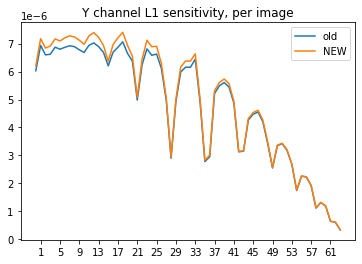

In [12]:
plt.plot(old_sel, label="old")
plt.plot(mean_lst, label="NEW")
plt.xticks(np.arange(1,65,4))
plt.legend()
plt.title('Y channel L1 sensitivity, per image')

In [13]:
old_np = np.array(old_sel)
mean_np = np.array(mean_lst)
old_np/mean_np

array([0.97187219, 0.9667225 , 0.96451635, 0.95719446, 0.95859138,
       0.95852803, 0.95279318, 0.95135651, 0.95218726, 0.95162109,
       0.95810095, 0.95358466, 0.95019927, 0.95400874, 0.9644067 ,
       0.97454365, 0.96094542, 0.95327547, 0.95364578, 0.95864563,
       0.97401024, 0.9800542 , 0.96995132, 0.95634003, 0.95561533,
       0.95928351, 0.97139076, 0.98551122, 0.98662446, 0.98202374,
       0.97148595, 0.96508028, 0.96553572, 0.97057993, 0.98109211,
       0.98170813, 0.98105868, 0.98146542, 0.97859816, 0.97827711,
       0.9777088 , 0.98694453, 0.99468384, 0.99524986, 0.98781061,
       0.98653118, 0.98606672, 0.98513114, 0.98417064, 0.98905005,
       0.99426929, 0.99577411, 0.99281127, 0.99375847, 0.9900678 ,
       0.99768901, 0.99827511, 0.99053677, 0.9911584 , 0.99577087,
       0.99114927, 0.99080853, 0.99023388, 0.98093249])